In [26]:
%run model.py
%run dataset.py
%matplotlib inline

from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms
import numpy as np
from PIL import ImageStat
import matplotlib.pyplot as plt
import random
import os

save_dir = './savedModels'

In [2]:
def show_tensor_image(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.50576189, 0.50576189, 0.50576189])
    inp = inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)

In [77]:
model = Model().to(torch.device('cuda'))
model.load_state_dict(torch.load(os.path.join(save_dir, 'net_v1_lr_1e-6.pth'))) 

In [78]:
trans = transforms.Compose([
    transforms.Resize(512),
    transforms.ToTensor(),
    transforms.Normalize([0.50576189], [1.])
])
dataset_bbox_only = CXRDataset_BBox_only('dataset', transform=trans, data_arg = False)
dataloader_bbox_only = DataLoader(dataset_bbox_only, batch_size=1, shuffle=True, num_workers=4)

In [79]:
images, labels, names, bboxes, bbox_valids = next(iter(dataloader_bbox_only))
print(labels)
print(names)
print(bbox_valids)

tensor([[ 0,  0,  0,  0,  0,  0,  1,  0]])
('00021818_026.png',)
tensor([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]], dtype=torch.float64)


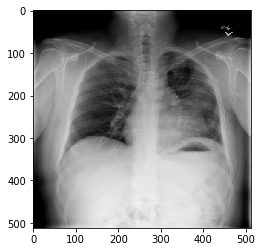

In [80]:
show_tensor_image(images[0])

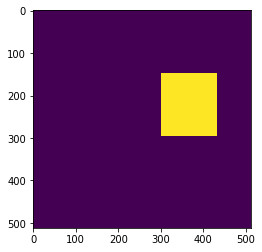

In [92]:
plt.imshow(bboxes[0][6])

In [93]:
images = images.to(torch.device('cuda'))
out, seg = model(images)

/home/student/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1749: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [94]:
print(out)

tensor([[ 0.1891,  0.0560,  0.2237,  0.8106,  0.5938,  0.4437,  0.6080,
          0.2883]], device='cuda:0')


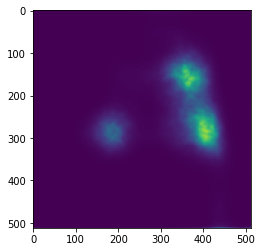

In [84]:
plt.imshow(seg.to('cpu').detach().numpy()[0][0])

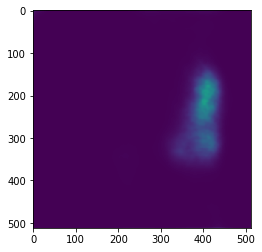

In [85]:
plt.imshow(seg.to('cpu').detach().numpy()[0][1])

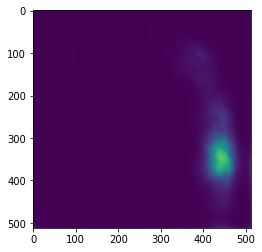

In [86]:
plt.imshow(seg.to('cpu').detach().numpy()[0][2])

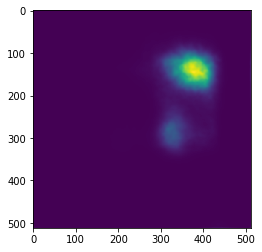

In [87]:
plt.imshow(seg.to('cpu').detach().numpy()[0][3])

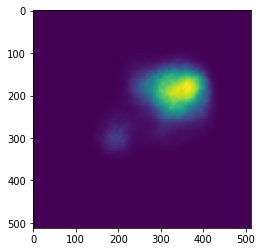

In [88]:
plt.imshow(seg.to('cpu').detach().numpy()[0][4])

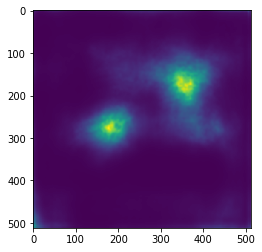

In [89]:
plt.imshow(seg.to('cpu').detach().numpy()[0][5])

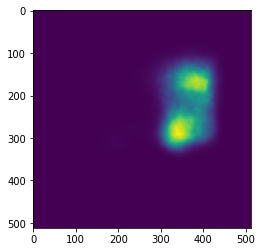

In [90]:
plt.imshow(seg.to('cpu').detach().numpy()[0][6])

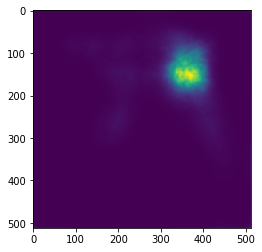

In [91]:
plt.imshow(seg.to('cpu').detach().numpy()[0][7])